In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
from statsmodels.tsa.stattools import adfuller

In [8]:
from statsmodels.tsa.arima_model import ARIMA

In [9]:
from statsmodels.tsa.stattools import acf,pacf

In [10]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [93]:
df=pd.read_csv(r"C:\Users\sanga\Python_coding\Simplilear data\Machine_Learning\Dataset\ARIMA-And-Seasonal-ARIMA-master\ARIMA-And-Seasonal-ARIMA-master\perrin-freres-monthly-champagne-.csv")

In [13]:
df.shape

(107, 2)

In [14]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [15]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [16]:
df.isnull().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [94]:
df.dropna(inplace=True)

In [18]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [95]:
df.columns=['Month','Sales']

In [20]:
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [21]:
df.shape

(105, 2)

In [23]:
df_sales=df.copy()

In [96]:
df['Month']=pd.to_datetime(df['Month'])

In [25]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


<AxesSubplot:xlabel='Sales'>

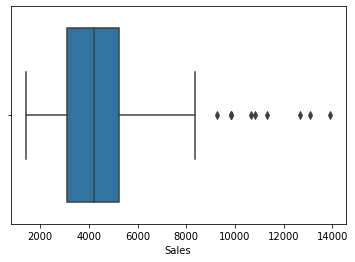

In [26]:
sns.boxplot(df['Sales'])

<AxesSubplot:xlabel='Sales', ylabel='Count'>

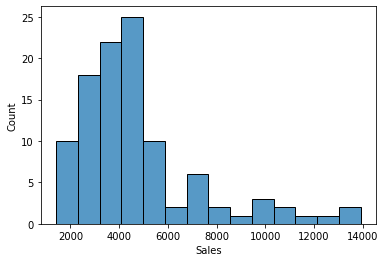

In [27]:
sns.histplot(df['Sales'])

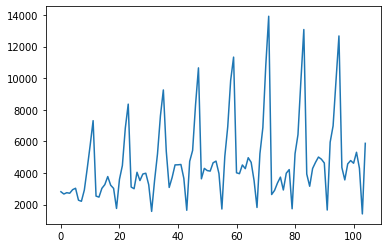

In [29]:
plt.plot(df['Sales'])

In [97]:
df.set_index('Month',inplace=True)

In [31]:
df.head(2)

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0


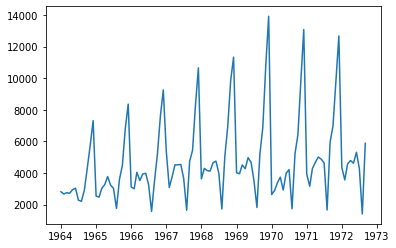

In [32]:
plt.plot(df['Sales'])

In [33]:
add_seasonal=seasonal_decompose(df,model='additive')

In [38]:
plt.rcParams['figure.figsize']=(10,6)

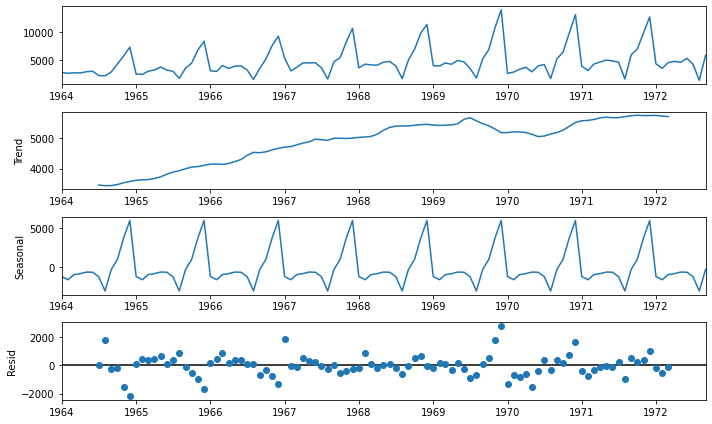

In [39]:
add_seasonal.plot()
plt.show()

In [40]:
mul_seasonal=seasonal_decompose(df,model='multiplicative')

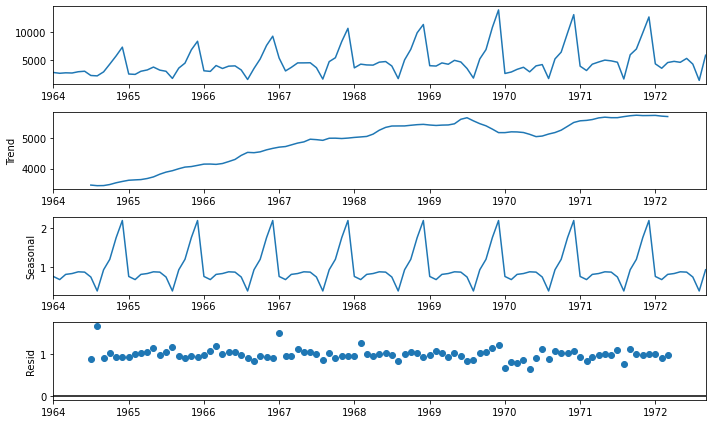

In [42]:
mul_seasonal.plot()
plt.show()

In [43]:
### As from above we can see some seasonality and litle trend

### Adfuller Test

In [44]:
adf=adfuller(df,autolag='AIC')

In [55]:
adf_res=pd.Series(adf[:4],index=['ADF_Statistic','pvalue','Lags_used','No_of_obervation'])

In [56]:
for key,value in adf[4].items():
    adf_res['Critical_values : (%s)'%key]=value

In [57]:
adf_res

ADF_Statistic              -1.833593
pvalue                      0.363916
Lags_used                  11.000000
No_of_obervation           93.000000
Critical_values : (1%)     -3.502705
Critical_values : (5%)     -2.893158
Critical_values : (10%)    -2.583637
dtype: float64

In [58]:
## we can see pvalue is muc greater than 0.05 nd also ADf_Statistic is greater then critical values so we cannot reject  
## null hypothesis which state that our time series is not stationary

### Seasonal Difference

In [59]:
df_sales.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [60]:
df_sales.set_index('Month',inplace=True)

In [61]:
df_sales.head(2)

,Sales
Month,
1964-01,2815.0
1964-02,2672.0


In [62]:
df['new_sales']=df['Sales']-df['Sales'].shift(1)

In [63]:
df.head(10)

,Sales,new_sales
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0
1964-06-01,3036.0,90.0
1964-07-01,2282.0,-754.0
1964-08-01,2212.0,-70.0
1964-09-01,2922.0,710.0


In [64]:
df['Sesonal_shift']=df['Sales']-df['Sales'].shift(12)

In [65]:
df.head(13)

,Sales,new_sales,Sesonal_shift
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [66]:
df_sales=df.copy()

In [67]:
df_sales.head(13)

,Sales,new_sales,Sesonal_shift
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [70]:
def test_stationary(x):
    adf=adfuller(x)
    adf_res=pd.Series(adf[:4],index=['ADF_Statistic','pvalue','lags_used','no_of_observation'])
    for key,value in adf[4].items():
        adf_res['Critial_values at %s :'%key]=value
    print(adf_res)

In [71]:
test_stationary(df['Sales'])

ADF_Statistic              -1.833593
pvalue                      0.363916
lags_used                  11.000000
no_of_observation          93.000000
Critial_values at 1% :     -3.502705
Critial_values at 5% :     -2.893158
Critial_values at 10% :    -2.583637
dtype: float64


ADF_Statistic             -7.189896e+00
pvalue                     2.519620e-10
lags_used                  1.100000e+01
no_of_observation          9.200000e+01
Critial_values at 1% :    -3.503515e+00
Critial_values at 5% :    -2.893508e+00
Critial_values at 10% :   -2.583824e+00
dtype: float64


In [75]:
df_sales=df_sales[1:]

In [76]:
test_stationary(df_sales['new_sales'])

ADF_Statistic             -7.189896e+00
pvalue                     2.519620e-10
lags_used                  1.100000e+01
no_of_observation          9.200000e+01
Critial_values at 1% :    -3.503515e+00
Critial_values at 5% :    -2.893508e+00
Critial_values at 10% :   -2.583824e+00
dtype: float64


In [77]:
test_stationary(df_sales['Sesonal_shift'].dropna())

ADF_Statistic             -7.626619e+00
pvalue                     2.060580e-11
lags_used                  0.000000e+00
no_of_observation          9.200000e+01
Critial_values at 1% :    -3.503515e+00
Critial_values at 5% :    -2.893508e+00
Critial_values at 10% :   -2.583824e+00
dtype: float64


In [79]:
df_sales.dropna(inplace=True)

In [81]:
df.dropna(inplace=True)

In [80]:
df_sales.head(2)

,Sales,new_sales,Sesonal_shift
Month,,,
1965-01-01,2541.0,-4771.0,-274.0
1965-02-01,2475.0,-66.0,-197.0


<AxesSubplot:xlabel='Month'>

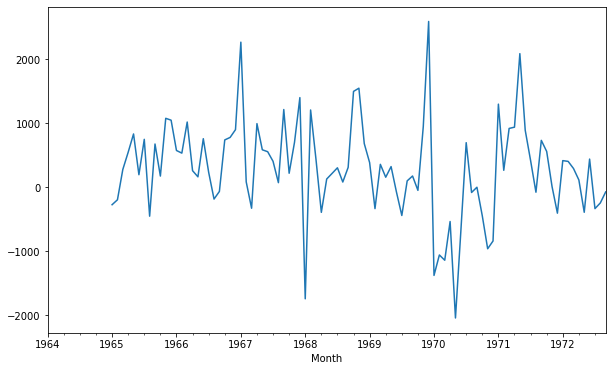

In [78]:
df['Sesonal_shift'].plot()

### Auto Regressive Model

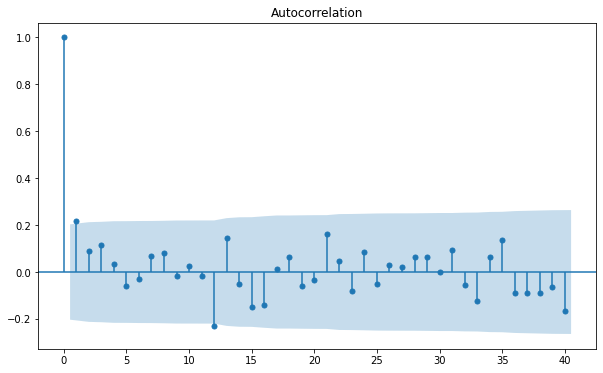

In [91]:
plot_acf(df['Sesonal_shift'],lags=40)
plt.show()

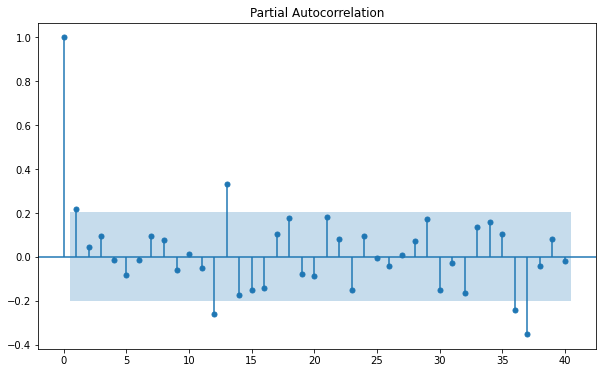

In [90]:
plot_pacf(df['Sesonal_shift'],lags=40)
plt.show()

In [98]:
df.shape

(105, 1)

In [99]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [100]:
model=ARIMA(df,order=(1,1,1))

C:\Users\sanga\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\sanga\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [103]:
model_fit=model.fit()

In [104]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Wed, 21 Dec 2022   AIC                           1910.251
Time:                        08:36:56   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7859     12.405      1.837      0.066      -1.528      47.100
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [105]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)

<AxesSubplot:xlabel='Month'>

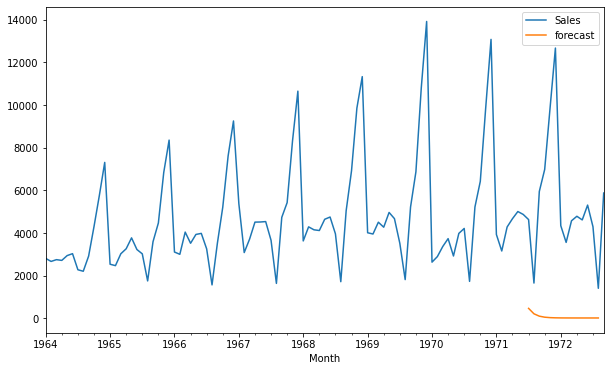

In [106]:
df.plot()

In [108]:
## Since above we fit a model with non stationary data so not performed wel,lets fit with stationary data

In [109]:
df_sales.head(2)

,Sales,new_sales,Sesonal_shift
Month,,,
1965-01-01,2541.0,-4771.0,-274.0
1965-02-01,2475.0,-66.0,-197.0


In [111]:
model_s=ARIMA(df_sales['Sesonal_shift'],order=(1,1,1))

C:\Users\sanga\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\sanga\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [112]:
model_s_fit=model_s.fit()

In [113]:
model_s_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.Sesonal_shift   No. Observations:                   92
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -739.804
Method:                       css-mle   S.D. of innovations            735.103
Date:                Wed, 21 Dec 2022   AIC                           1487.607
Time:                        08:48:07   BIC                           1497.695
Sample:                    02-01-1965   HQIC                          1491.679
                         - 09-01-1972                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -4.8775      3.531     -1.381      0.167     -11.797       2.042
ar.L1.D.Sesonal_shift     0.2021      0.103      1.958      0.050      -0.000       0.405
ma.L1.D.Sesonal_shift    -0.9999      0.033    -30.268      0.000      -1.065      -0.935
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            4.9471           +0.0000j            4.9471            0.0000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [114]:
df.head()

,Sales,forecast
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN


In [115]:
df_sales.head()

,Sales,new_sales,Sesonal_shift
Month,,,
1965-01-01,2541.0,-4771.0,-274.0
1965-02-01,2475.0,-66.0,-197.0
1965-03-01,3031.0,556.0,276.0
1965-04-01,3266.0,235.0,545.0
1965-05-01,3776.0,510.0,830.0


In [125]:
df_new=pd.merge(df.drop('forecast',axis=1),df_sales,on='Sales',how='left')

In [130]:
df_new.head(13)

,Sales,new_sales,Sesonal_shift
0,2815.0,NaN,NaN
1,2672.0,NaN,NaN
2,2755.0,NaN,NaN
3,2721.0,NaN,NaN
4,2946.0,NaN,NaN
5,3036.0,NaN,NaN
6,2282.0,NaN,NaN
7,2212.0,NaN,NaN
8,2922.0,NaN,NaN
9,4301.0,NaN,NaN


In [131]:
df_new['forecast']=model_s_fit.predict(start=93,end=107,dynamic=True)

<AxesSubplot:>

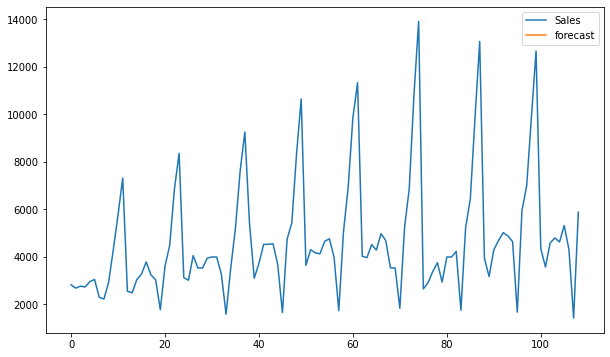

In [134]:
df_new[['Sales','forecast']].plot()

In [136]:
df_new.isnull().sum()

Sales              0
new_sales         12
Sesonal_shift     12
forecast         109
dtype: int64

### SARIMA Model

In [107]:
import statsmodels.api as sm

In [138]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))

C:\Users\sanga\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\sanga\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [140]:
results=model.fit()

In [141]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)

<AxesSubplot:xlabel='Month'>

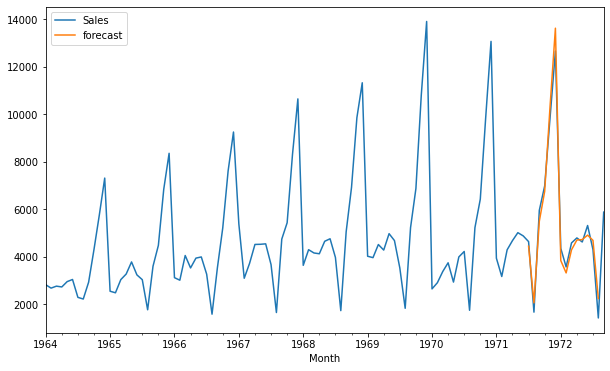

In [142]:
df[['Sales','forecast']].plot()

In [143]:
from pandas.tseries.offsets import DateOffset

In [145]:
future_dates=[df.index[-1]+DateOffset(months=x) for x in range(0,24)]

In [146]:
future_dates_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [148]:
future_dates_df.head()

,Sales,forecast
1972-10-01,NaN,NaN
1972-11-01,NaN,NaN
1972-12-01,NaN,NaN
1973-01-01,NaN,NaN
1973-02-01,NaN,NaN


In [150]:
future_df=pd.concat([df,future_dates_df])

In [151]:
future_df.shape

(128, 2)

In [152]:
future_df['forecast']=results.predict(start=104,end=127,dynamic=True)

<AxesSubplot:>

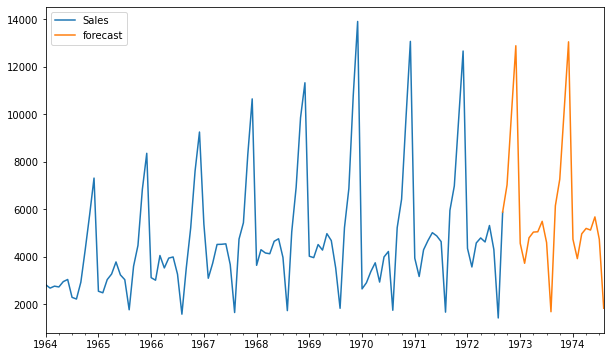

In [153]:
future_df[['Sales','forecast']].plot()

In [154]:
future_df.tail(10)

,Sales,forecast
1973-11-01,NaN,10194.735770
1973-12-01,NaN,13057.412865
1974-01-01,NaN,4731.200250
1974-02-01,NaN,3915.317135
1974-03-01,NaN,4961.390731
1974-04-01,NaN,5189.452531
1974-05-01,NaN,5119.495075
1974-06-01,NaN,5675.241750
1974-07-01,NaN,4726.202581
1974-08-01,NaN,1823.475377
